In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('data/knn.csv')
#data.columns
data.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
data.head()

,x1,x2,y
0,9,29,0
1,36,11,0
2,15,25,0
3,0,10,0
4,49,16,0


In [6]:
# Seperate features and target
features = data[['x1','x2']]
target = data['y']

##### KNN Classifier
- Fit --> Store the features and target
- Predict
    - prediction multiple points
    - run a loop for point by point
        - calculate the nearest neighbors indices
        - get the outcomes of the nearest neighbors
        - predict the output based on neighbors class
        

In [28]:
class knn():
    def __init__(self,distance='L2',k = 5):
        self.distance = distance
        self.k=k
    def fit(self,features,target):
        self.features = features
        self.target = target
    def eucledian_distance(self,p1,p2):
        return np.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)
    def manhattan_distance(self,p1,p2):
        return abs(p1[0]-p2[0]) + abs(p1[1]-p2[1])
    def nearest_neighbors_indices(self,p):
        if self.distance=='L1':
            self.distances = []
            for i,feature in self.features.iterrows():
                self.distances.append(self.manhattan_distance\
                                      (p,feature))
            self.distances = np.array(self.distances)
            return self.distances.argsort()[:self.k]
        elif self.distance=='L2':
            self.distances = []
            for i,feature in self.features.iterrows():
                self.distances.append(self.eucledian_distance\
                                      (p,feature))
            self.distances = np.array(self.distances)
            return self.distances.argsort()[:self.k]
        
    def predict(self,test):
        # test - data observations to predict outcomes
        # test is a DataFrame
        outputs =[]
        for _,feature in test.iterrows():
            ind = self.nearest_neighbors_indices(feature)
            outputs.append(self.target[ind].\
                           value_counts().index[0])
        return outputs


In [34]:
obj = knn()
obj.fit(features,target)
obj.predict(test)

[0, 0, 0, 1]

In [38]:
pred = np.array(obj.predict(features))

In [41]:
pred

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [43]:
features.iloc[5,:]

x1    28
x2    19
Name: 5, dtype: int64

In [32]:
test = pd.DataFrame(np.array([[23,49],[34,43],[12,27],[60,10]]))

In [33]:
test

,0,1
0,23,49
1,34,43
2,12,27
3,60,10


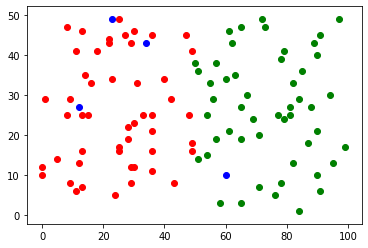

In [35]:
plt.scatter(features['x1'][:50],features['x2'][:50],
            color = 'r')
plt.scatter(features['x1'][50:],features['x2'][50:],
            color = 'g')
plt.scatter(test[0],test[1],color='b')

In [36]:
from sklearn.neighbors import KNeighborsClassifier
obj1 = KNeighborsClassifier()
obj1.fit(features,target)
obj1.predict(test)

array([0, 0, 0, 1], dtype=int64)

In [44]:
obj1.predict(features)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)